In [2]:
import pickle
import xml.etree.ElementTree as ET
import urllib.request
import pandas as pd

In [6]:
# Source: https://open-meteo.com/en/docs/historical-weather-api#latitude=38.90&longitude=-77.04&start_date=2010-09-20&end_date=2023-03-18&hourly=temperature_2m,apparent_temperature,precipitation,windspeed_10m&timezone=America%2FNew_York

stations = pd.read_csv("data/weather.csv")
df = stations.copy()


In [9]:
df = df.rename(columns={
    'time': 'date',
    'temperature_2m (°C)': 'temp', 
    'apparent_temperature (°C)': 'atemp',
    'precipitation (mm)': 'rain',
    'windspeed_10m (km/h)': 'wind'
})

display(df.head())

,date,temp,atemp,rain,wind
0,2010-09-20T00:00,19.8,21.0,0.0,4.4
1,2010-09-20T01:00,19.5,20.3,0.0,7.1
2,2010-09-20T02:00,19.3,19.6,0.0,10.5
3,2010-09-20T03:00,19.3,19.3,0.0,12.1
4,2010-09-20T04:00,19.1,18.9,0.0,13.4


In [10]:
df.describe()

,temp,atemp,rain,wind
count,109460.000000,109460.000000,109460.000000,109460.000000
mean,13.740440,12.547090,0.129926,10.227120
std,10.068524,12.767302,0.568376,5.198935
min,-21.600000,-27.400000,0.000000,0.000000
25%,5.500000,1.700000,0.000000,6.600000
50%,14.100000,12.400000,0.000000,9.200000
75%,22.100000,23.700000,0.000000,12.800000
max,41.000000,45.700000,17.700000,45.100000


In [20]:
df[df.rain > 10].head()

,date,temp,atemp,rain,wind
263,2010-09-30 23:00:00,19.9,20.5,11.8,20.5
264,2010-10-01 00:00:00,19.2,19.8,12.3,18.7
265,2010-10-01 01:00:00,18.1,18.0,14.5,19.5
266,2010-10-01 02:00:00,17.3,16.4,17.6,22.0
15787,2012-07-08 19:00:00,27.2,33.4,13.1,4.0


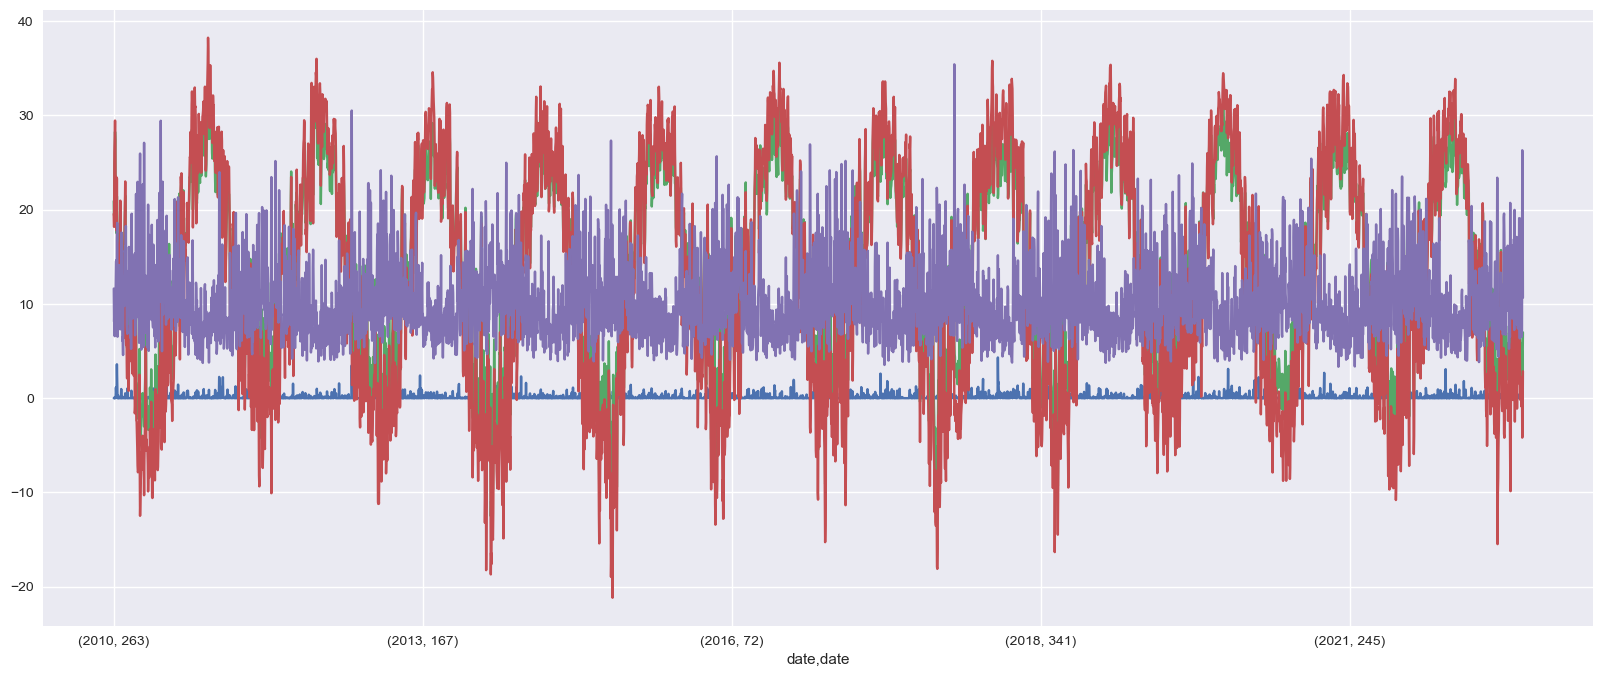

In [31]:
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations

fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# set plt parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

# convert to datetime
df.date = pd.to_datetime(df.date)

# groupby day, count and plot
g = df.groupby([df.date.dt.year, df.date.dt.day_of_year])["rain"].mean().plot.line()
g = df.groupby([df.date.dt.year, df.date.dt.day_of_year])["temp"].mean().plot.line()
g = df.groupby([df.date.dt.year, df.date.dt.day_of_year])["atemp"].mean().plot.line()
g = df.groupby([df.date.dt.year, df.date.dt.day_of_year])["wind"].mean().plot.line()

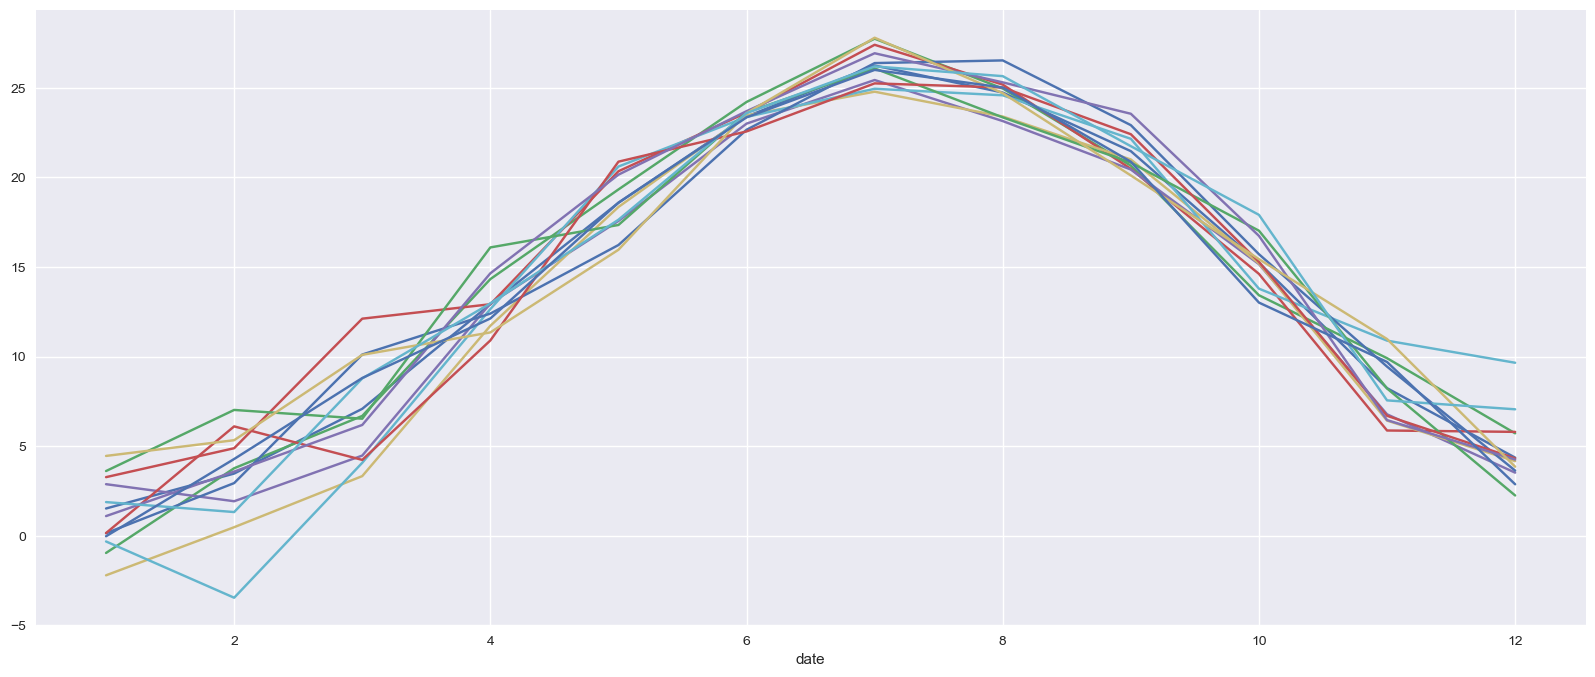

In [48]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# set plt parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

# groupby day, count and plot
#g = df.groupby([df.date.dt.day_of_year])["rain"].mean().plot.line()
g = df.groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2011].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2012].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2013].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2014].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2015].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2016].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2017].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2018].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2019].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2020].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2021].groupby([df.date.dt.month])["temp"].mean().plot.line()
g = df[df.date.dt.year==2022].groupby([df.date.dt.month])["temp"].mean().plot.line()
#g = df.groupby([df.date.dt.day_of_year])["atemp"].mean().plot.line()
#g = df.groupby([df.date.dt.day_of_year])["wind"].mean().plot.line()

In [16]:
pickle.dump(df, open( "weather.pkl", "wb" ) )